In [7]:
from eda_imports import *

import pysam

import kleat.misc.settings as S
import kleat.misc.utils as U

In [2]:
adf = pd.read_pickle('../benchmark_transcriptome/cluster-first/HBRC6.pkl')

In [4]:
adf.shape

(2214056, 30)

In [3]:
lele_df = pd.read_pickle('../benchmark_transcriptome/tcga-run-3/HBRC6.pkl')

In [5]:
lele_df.shape

(2300727, 30)

(-10, 300)

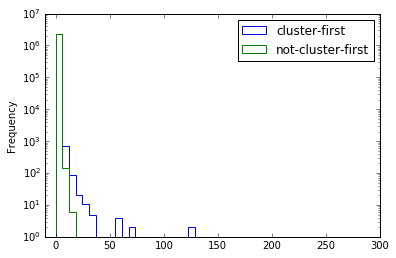

In [12]:
ax = plt.axes()

bins = np.linspace(0, 300, 50)
adf.num_total_contigs.plot.hist(bins=bins, histtype='step', ax=ax, label='cluster-first')
lele_df.num_total_contigs.plot.hist(bins=bins, histtype='step', ax=ax, label='not-cluster-first')
ax.set_yscale('log')
ax.legend()
ax.set_xlim(-10, 300)

In [9]:
adf.num_total_contigs.astype(int).describe()

count    805569.000000
mean     1.145263     
std      3.646358     
min      1.000000     
25%      1.000000     
50%      1.000000     
75%      1.000000     
max      1594.000000  
Name: num_total_contigs, dtype: float64

In [10]:
lele_df.num_total_contigs.astype(int).describe()

count    870121.000000
mean     1.060299     
std      0.522455     
min      1.000000     
25%      1.000000     
50%      1.000000     
75%      1.000000     
max      74.000000    
Name: num_total_contigs, dtype: float64

In [6]:
adf.head()

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
0,chr1,+,12199,13671,DDX11L1,ENSG00000223972,-1472,blank,E0.U.254180@78,79,1,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1
1,chr1,+,14748,14413,DDX11L1,ENSG00000223972,335,blank,E0.U.314563@74,40,0,True,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1
2,chr1,+,15202,14413,DDX11L1,ENSG00000223972,789,blank,E1.L.11074@363,364,3,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1
3,chr1,+,15423,14413,DDX11L1,ENSG00000223972,1010,blank,E1.S.21558@305,306,40,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1
4,chr1,+,15609,14413,DDX11L1,ENSG00000223972,1196,blank,01.L.357906@184,185,2,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1


In [4]:
adf.shape

(805569, 30)

In [7]:
lele_df.sort_values('num_total_contigs', ascending=False).head()

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
837828,chrM,-,2681,4328,MT-TQ,ENSG00000210107,-1647,blank|bridge,01.L.369628@0|01.L.374653@0|01.L.378103@0|01.U.1046489@0|01.U.1094958@0|01.U.1224012@0|01.U.407189@0|01.U.407441@0|01.U.407882@0|01.U.408153@0|01.U.408384@0|01.U.408593@0|01.U.409017@0|01.U.409154@0|01.U.409439@0|01.U.409616@0|01.U.409697@0|01.U.412270@0|01.U.414058@0|01.U.416740@0|01.U.417500@0|01.U.418924@0|01.U.419698@0|01.U.420015@0|01.U.420373@0|01.U.422090@0|01.U.422658@0|01.U.423468@0|01.U.424123@0|01.U.426761@0|01.U.426941@0|01.U.427618@0|01.U.427640@0|01.U.428613@0|01.U.429022@0|01.U.429249@0|01.U.430072@0|01.U.430233@0|01.U.430547@0|01.U.430864@0|01.U.430925@0|01.U.431334@0|01.U.432140@0|01.U.434175@0|01.U.434711@0|01.U.456186@0|01.U.499012@0|01.U.505519@0|01.U.508456@0|01.U.534791@0|01.U.548860@0|01.U.574818@0|01.U.617630@0|01.U.669391@0|01.U.678894@0|01.U.723841@0|01.U.733899@0|01.U.752304@0|01.U.801889@0|01.U.801905@0|01.U.802911@0|01.U.825846@0|01.U.915882@0|01.U.926280@0|01.U.952250@0|E0.U.118888@0|E0.U.120761@0|E0.U.121394@0|E0.U.121851@0|E0.U.122019@0|E0.U.283586@0|E0.U.320370@0|E0.U.343797@0|E0.U.348859@0,222,40,True,0,1,0,73,74,0,0,1,1,0,NA,-1,-1,-1,NA,-1,-1,-1
833972,chrM,+,2756,3230,MT-RNR2,ENSG00000210082,-474,blank|bridge|suffix,01.L.355862@101|01.L.363689@162|01.L.364880@80|01.L.365497@125|01.L.381339@140|01.L.384226@102|01.L.385617@81|01.U.1016422@83|01.U.1086210@82|01.U.1133220@75|01.U.1188320@99|01.U.1190053@73|01.U.1229066@75|01.U.406821@75|01.U.407189@75|01.U.407353@75|01.U.408003@91|01.U.408159@87|01.U.408403@75|01.U.408796@79|01.U.408853@72|01.U.409154@83|01.U.409300@75|01.U.416640@75|01.U.417369@92|01.U.422090@84|01.U.422162@75|01.U.422247@75|01.U.425429@91|01.U.425730@75|01.U.427335@74|01.U.427526@90|01.U.427753@75|01.U.428841@85|01.U.430072@75|01.U.430547@75|01.U.430744@73|01.U.431587@75|01.U.431918@85|01.U.432020@75|01.U.432759@75|01.U.433298@75|01.U.433804@75|01.U.433895@75|01.U.434626@89|01.U.435061@95|01.U.521476@87|01.U.558050@74|01.U.669391@84|01.U.706269@92|01.U.777388@78|01.U.801905@75|01.U.869887@75|01.U.915882@84|01.U.931806@83|E0.L.41382@67|E0.L.60040@99|E0.L.60421@78|E0.L.63879@86|E0.U.118239@90|E0.U.118862@76|E0.U.118932@90|E0.U.120761@75|E0.U.174115@83|E0.U.259878@91|E0.U.343797@75|E1.L.13140@81|E1.L.14565@90|E1.U.25709@91|E1.U.27604@102|E2.U.24916@101|E4.L.3@2445,5210,40,True,35,20,0,17,72,0,5,33,7,0,AAAAAG,7,2715,41,NA,-1,-1,-1
838867,chrM,-,8376,7445,MT-TS1,ENSG00000210151,931,blank,01.L.351159@0|01.L.360454@0|01.L.360536@0|01.L.364485@0|01.L.365309@0|01.L.370483@0|01.L.373878@0|01.L.379101@0|01.L.382246@0|01.S.391516@0|01.U.1009322@0|01.U.1010626@0|01.U.1058213@0|01.U.1059799@0|01.U.1112540@0|01.U.1158523@0|01.U.1185684@0|01.U.1196491@0|01.U.1204818@0|01.U.409073@0|01.U.409395@0|01.U.410902@0|01.U.412015@0|01.U.415069@0|01.U.416804@0|01.U.416977@0|01.U.420428@0|01.U.422575@0|01.U.423565@0|01.U.425319@0|01.U.425518@0|01.U.426603@0|01.U.428728@0|01.U.428781@0|01.U.431655@0|01.U.431706@0|01.U.432076@0|01.U.432529@0|01.U.432593@0|01.U.433679@0|01.U.434005@0|01.U.466901@0|01.U.470549@0|01.U.484785@0|01.U.545636@0|01.U.561752@0|01.U.614813@0|01.U.620644@0|01.U.659156@0|01.U.672406@0|01.U.680794@0|01.U.698053@0|01.U.713914@0|01.U.766883@0|01.U.786297@0|01.U.795133@0|01.U.845331@0|01.U.914178@0|01.U.958702@0|01.U.975849@0|01.U.985732@0|E0.L.30336@0|E0.L.44207@0|E0.L.68130@0|E0.U.118142@0|E0.U.119251@0|E0.U.119515@0|E0.U.121017@0|E0.U.184598@0|E1.L.14611@0|E1.S.18218@0,290,40,True,0,0,0,71,71,0,0,0,0,0,TTTAAA,3,8423,47,NA,-1,-1,-1
838870,chrM,-,8383,7445,MT-TS1,ENSG00000210151,938,blank,01.L.35022

In [5]:
lele_df.shape

(870121, 30)

In [3]:
dfs = []
for i in glob.glob('../max_recall.*'):
    dfs.append(pd.read_csv(i, sep='\t'))

In [6]:
ndf = pd.concat(dfs).sort_values('sample_id')

In [7]:
ndf

,sample_id,precision,recall,f1
0,HBRC4,0.026774,0.242732,0.048228
0,HBRC6,0.014323,0.359445,0.027547
0,UHRC1,0.025576,0.198304,0.045308
0,UHRC2,0.023578,0.222404,0.042635


In [2]:
sys.path.insert(0, '../../kleat/benchmark_scripts/')

In [3]:
# from train_arbor import cluster_clv, compare

In [13]:
from max_recall_analysis import cluster_clv_parallel, map_to_ref

# Compare current version and a previous ref-hex-dist version

In [5]:
cur_df = pd.read_pickle('./../../kleat/benchmark_transcriptome/current-buggy/UHRC1.pkl')

In [6]:
cur_df.shape

(869893, 30)

In [7]:
%time cur_df_clustered = cluster_clv_parallel(cur_df)

2018-07-17 14:29:05,229|INFO|grouping by ['seqname', 'strand']
100%|██████████| 50/50 [00:00<00:00, 139.83it/s]


clustering clvs in parallel) using 24 CPUs ...


2018-07-17 14:30:00,349|INFO|concatenating clustered sub dataframes ...
2018-07-17 14:30:01,181|INFO|dropping duplicates after clustering ...


CPU times: user 21.6 s, sys: 3.5 s, total: 25.1 s
Wall time: 57 s


In [8]:
%time ref_df = pd.read_pickle('./../../kleat/benchmark_transcriptome/after_chimeric-ref-hex/UHRC1.pkl')

CPU times: user 2.4 s, sys: 460 ms, total: 2.86 s
Wall time: 2.86 s


In [9]:
ref_df.shape

(869986, 30)

In [10]:
%time ref_df_clustered = cluster_clv_parallel(ref_df)

2018-07-17 14:30:38,580|INFO|grouping by ['seqname', 'strand']
100%|██████████| 50/50 [00:00<00:00, 163.00it/s]


clustering clvs in parallel) using 24 CPUs ...


2018-07-17 14:31:33,376|INFO|concatenating clustered sub dataframes ...
2018-07-17 14:31:34,184|INFO|dropping duplicates after clustering ...


CPU times: user 21.9 s, sys: 3.01 s, total: 24.9 s
Wall time: 56.9 s


In [11]:
ref_df_clustered.shape

(805439, 3)

In [14]:
print('mapping ...')
map_cutoff = 50
df_mapped = map_to_ref(cur_df_clustered, ref_df_clustered, map_cutoff)
df_mapped['is_tp'] = df_mapped.abs_dist < map_cutoff

2018-07-17 14:33:38,391|INFO|mapping predicted clv to ground truth ...


mapping ...


In [16]:
print('calculating metrics ...')
recall = df_mapped.query('is_tp').shape[0] / ref_df_clustered.shape[0]
precision = df_mapped.query('is_tp').shape[0] / df_mapped.shape[0]
f1 = (2 * recall * precision) / (recall + precision)

calculating metrics ...


In [20]:
print(f'{precision}\t{recall}\t{f1}')

0.9997479250381217	0.9995952517819475	0.9996715825808393


In [21]:
df_mapped.head(2)

,seqname,strand,clv,mapped_ref_clv,dist,abs_dist,is_tp
0,chr1,+,12199,12199,0,0,True
1,chr1,+,14748,14748,0,0,True


In [4]:
cur_df['clv_m1'] = cur_df.clv - 1
cur_df['clv_p1'] = cur_df.clv + 1

In [5]:
cur_clvs_m1 = set([tuple(_) for _ in cur_df[['seqname', 'strand', 'clv_m1']].values])
cur_clvs    = set([tuple(_) for _ in cur_df[['seqname', 'strand', 'clv'   ]].values])
cur_clvs_p1 = set([tuple(_) for _ in cur_df[['seqname', 'strand', 'clv_p1']].values])

In [6]:
cur_clvs_set = cur_clvs_m1 | cur_clvs | cur_clvs_p1

In [7]:
len(cur_clvs_set)

2577194

In [8]:
len(cur_clvs_m1) + len(cur_clvs) + len(cur_clvs_p1)

2609679

In [15]:
%time ref_clvs = set([tuple(_) for _ in ref_df[['seqname', 'strand', 'clv']].values])

CPU times: user 1.35 s, sys: 32.9 ms, total: 1.38 s
Wall time: 1.38 s


In [16]:
len(ref_clvs - cur_clvs_set)

534

In [17]:
len(cur_clvs_set - ref_clvs)

1707742

In [18]:
missed = ref_clvs - cur_clvs_set

In [19]:
list(missed)[:5]

[('chr7', '+', 73660993),
 ('chr6', '+', 75950892),
 ('chr19', '+', 649680),
 ('chr16', '-', 78534894),
 ('chr13', '+', 40914558)]

In [20]:
missed_clvs = [_[2] for _ in missed]

In [35]:
missed_df = ref_df.query(f'clv in {missed_clvs}').copy()

In [36]:
missed_df.evidence_type.value_counts()

bridge    534
blank     10 
Name: evidence_type, dtype: int64

In [37]:
missed_df['abs_dist_to_aclv'] = missed_df.signed_dist_to_aclv.abs()

In [41]:
missed_df.query('evidence_type == "bridge"')\
    .query('ref_hex == "AATAAA"').sort_values('abs_dist_to_aclv').head(10)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist,abs_dist_to_aclv
657410,chr5,-,74017080,74017083,GFM2,ENSG00000164347,-3,bridge,E0.L.64191,963,40,False,0,1,0,0,1,0,0,2,5,0,AATAAA,16,74017103,23,AATAAA,16,74017105,25,3
798032,chr8,-,144668458,144668388,EEF1D,ENSG00000104529,70,bridge,E1.L.11467,1298,40,False,0,1,0,0,1,0,0,1,1,0,AATAAA,16,144668497,39,AATAAA,16,144668497,39,70
824660,chr9,-,99314154,99314082,CDC14B,ENSG00000081377,72,bridge,E1.L.4856,2381,40,False,0,1,0,0,1,0,0,2,2,0,AATAAA,16,99314188,34,AATAAA,16,99314188,34,72
245655,chr14,-,50050393,50050296,RPS29,ENSG00000213741,97,bridge,E1.L.7611,401,40,False,0,1,0,0,1,0,0,2,2,0,AATAAA,16,50050420,27,AATAAA,16,50050420,27,97
439840,chr2,+,170492976,170492752,PPIG,ENSG00000138398,224,bridge,E0.L.63481,374,0,True,0,1,0,0,1,0,0,2,1,0,NA,-1,-1,-1,AATAAA,16,170492937,39,224
443718,chr2,+,198367763,198368020,HSPE1,ENSG00000115541,-257,bridge,E3.L.197,616,40,False,0,1,0,0,1,0,0,4,2,0,AATAAA,16,198367738,25,AATAAA,16,198367738,25,257
477802,chr2,-,198360099,198359774,HSPD1,ENSG00000144381,325,bridge,E3.L.96,1923,40,False,0,1,0,0,1,0,0,6,2,0,AATAAA,16,198360134,35,AATAAA,16,198360134,35,325
833396,chrM,+,997,648,MT-TF,ENSG00000210049,349,bridge,E0.L.43441,274,0,True,0,1,0,0,1,0,0,1,2,0,NA,-1,-1,-1,AATAAA,16,967,30,349
550652,chr3,+,101284073,101284562,TRMT10C,ENSG00000174173,-489,bridge,E0.S.109816,106,40,True,0,1,0,0,1,0,0,6,5,0,NA,-1,-1,-1,AATAAA,16,101284065,8,489
712114,chr6,-,135307948,135308791,HBS1L,ENSG00000112339,-843,bridge,E2.L.2538,2699,40,False,0,1,0,0,1,0,0,2,2,0,AATAAA,16,135307968,20,AATAAA,16,135307968,20,843


In [44]:
cur_df[cur_df.contig_ids.str.contains('E1.L.11467')]

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist,clv_m1,clv_p1
781363,chr8,+,144677134,144682485,TIGD5,ENSG00000179886,-5351,blank,E1.L.11467,1298,40,False,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,144677133,144677135
797962,chr8,-,144663470,144663248,EEF1D,ENSG00000104529,222,blank,E0.S.110148|E1.L.11467,1298,40,False,0,0,0,2,2,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,144663469,144663471
797971,chr8,-,144668898,144668898,EEF1D,ENSG00000104529,0,blank|bridge,E0.U.122352|E1.L.11467,1298,40,False,0,1,0,1,2,0,0,1,1,0,NA,-1,-1,-1,NA,-1,-1,-1,144668897,144668899


In [26]:
cur_df.query('clv == 74017082')

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist,clv_m1,clv_p1
657356,chr5,-,74017082,74017083,GFM2,ENSG00000164347,-1,bridge,E0.L.64191|E0.U.323536,963,40,False,0,2,0,0,2,0,0,4,5,0,AATAAA,16,74017105,23,AATAAA,16,74017105,23,74017081,74017083


In [42]:
# missed_df.query('evidence_type == "bridge"').query('signed_dist_to_aclv <= 0').sort_values('signed_dist_to_aclv', ascending=False)\
#     .head(10).reset_index(drop=True).iloc[5:]

In [24]:
cur_df.query('contig_ids == "01.U.576215"')

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist,clv_m1,clv_p1
812011,chr9,+,129638500,129648154,ZBTB34,ENSG00000177125,-9654,blank,01.U.576215,42,0,True,0,0,0,1,1,0,0,0,0,0,NA,-1,-1,-1,NA,-1,-1,-1,129638499,129638501


In [27]:
missed_df.query('evidence_type == "bridge"').sort_values('num_bridge_reads', ascending=False).head()

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,max_suffix_contig_tail_len,num_bridge_reads,max_bridge_read_tail_len,num_link_reads,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
288391,chr16,+,16388114,16388135,NOMO3,ENSG00000103226,-21,bridge,01.L.377168,184,0,True,0,1,0,0,1,0,0,67,2,0,NA,-1,-1,-1,NA,-1,-1,-1
718349,chr7,+,5566820,5596877,CTB-161C1.1,ENSG00000272719,-30057,bridge,E0.L.69552,267,40,True,0,1,0,0,1,0,0,26,7,0,NA,-1,-1,-1,NA,-1,-1,-1
639318,chr5,+,117081763,116881994,LINC00992,ENSG00000248663,199769,bridge,01.U.677024,75,4,False,0,1,0,0,1,0,0,15,24,0,NA,-1,-1,-1,NA,-1,-1,-1
706718,chr6,-,79918293,79910962,HMGN3,ENSG00000118418,7331,bridge,E2.L.1715,856,40,False,0,1,0,0,1,0,0,13,2,0,NA,-1,-1,-1,NA,-1,-1,-1
629627,chr5,+,33631226,33503241,CTD-2233C11.3,ENSG00000249360,127985,bridge,01.U.1059438,75,40,False,0,1,0,0,1,0,0,12,10,0,NA,-1,-1,-1,NA,-1,-1,-1
